<h1><center>Report 14</center></h1>
<h3><center>Jiachen Tian</center><h3>

# Introduction
At this poit, all the necessary trackings are done for the glint and pupil apart for some detailed calibrations. Moreover, tradeoffs between making the data more readable and making it more reliable would also be considered when imposing the calibrations. for this report, I've updated user interface to be more interactive, and I've also started doing eye points mapping. 

# Setup
Setup path to include our files. import them. use `autoreload` to get changes in as they are made. 

In [139]:
import os
import sys
import cv2
from matplotlib import pyplot as plt
import statistics 
import scipy.stats as stats
import numpy as np
import csv

# load our code
sys.path.insert(0, os.path.abspath('../'))
from plotting import auto_draw
# specific to jupyter notebook
from jupyter_help import cvplt, cvplt_sub
#Import image processing function from optimization
# load any changes as we make them
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Possible solution discussion

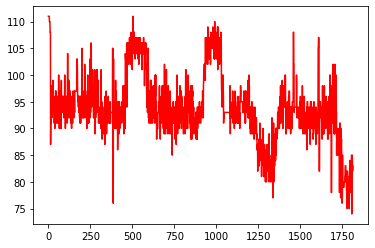

In [144]:
#Read in the data
columns = []
as_dict = None
file = '../data_output/filter_pupil.csv'  
with open(file) as csvfile:
    readCSV = csv.reader(csvfile, delimiter=',')
    for row in readCSV:
        if columns:
            for i, value in enumerate(row):
                columns[i].append(int(value))
        else:
            # first row
            columns = [[value] for value in row]
            # you now have a column-major 2D array of your file.
    as_dict = {c[0] : c[1:] for c in columns}

#video frame

image = plt.plot(as_dict['sample'], as_dict['x'], 'r-', label = 'x')
    

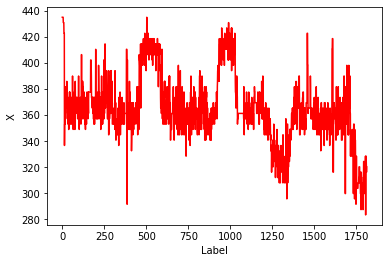

In [141]:
#First step should be a linear transformation for each "texture"
#take x for example
#but first get the necessary parameter a and b
#ax+b = x1
#ay+b = y1
#The screen is 1024 x 786
#We can't be sure if the eye is actually at it's original position when starting the tracker, 
#so we have to use the iamge size instead to map
image = cv2.imread("../input/chosen_pic.png")
size_x_image = image.shape[0]
size_y_image = image.shape[1]

#Size for the camera
size_x_camera = 1004
size_y_camera = 786

#Even though eye movement might not be linear, but the transform from two images is definitly linear
#a = (c1-c2)/x1-x2
#b = (x1c2 - x2c1)/x1-x2
#(c1 = 20) 256 512 768 (c2 = 1004)
#(x1 = 0) (x2 = size_x_image)
a = (20 - size_x_camera)/(0 - size_x_image)
b = (size_x_image*20)/(0 - size_x_image)
sample = as_dict['x']
# print(sample)
#Now map every point in x
for i in range(len(sample)):
    sample[i] = a*sample[i]+b

#See what it looks like, focus on the y index
plt.ylabel('X')
plt.xlabel('Label')
image = plt.plot(as_dict['sample'], sample, 'r-', label = 'x')


# Interface

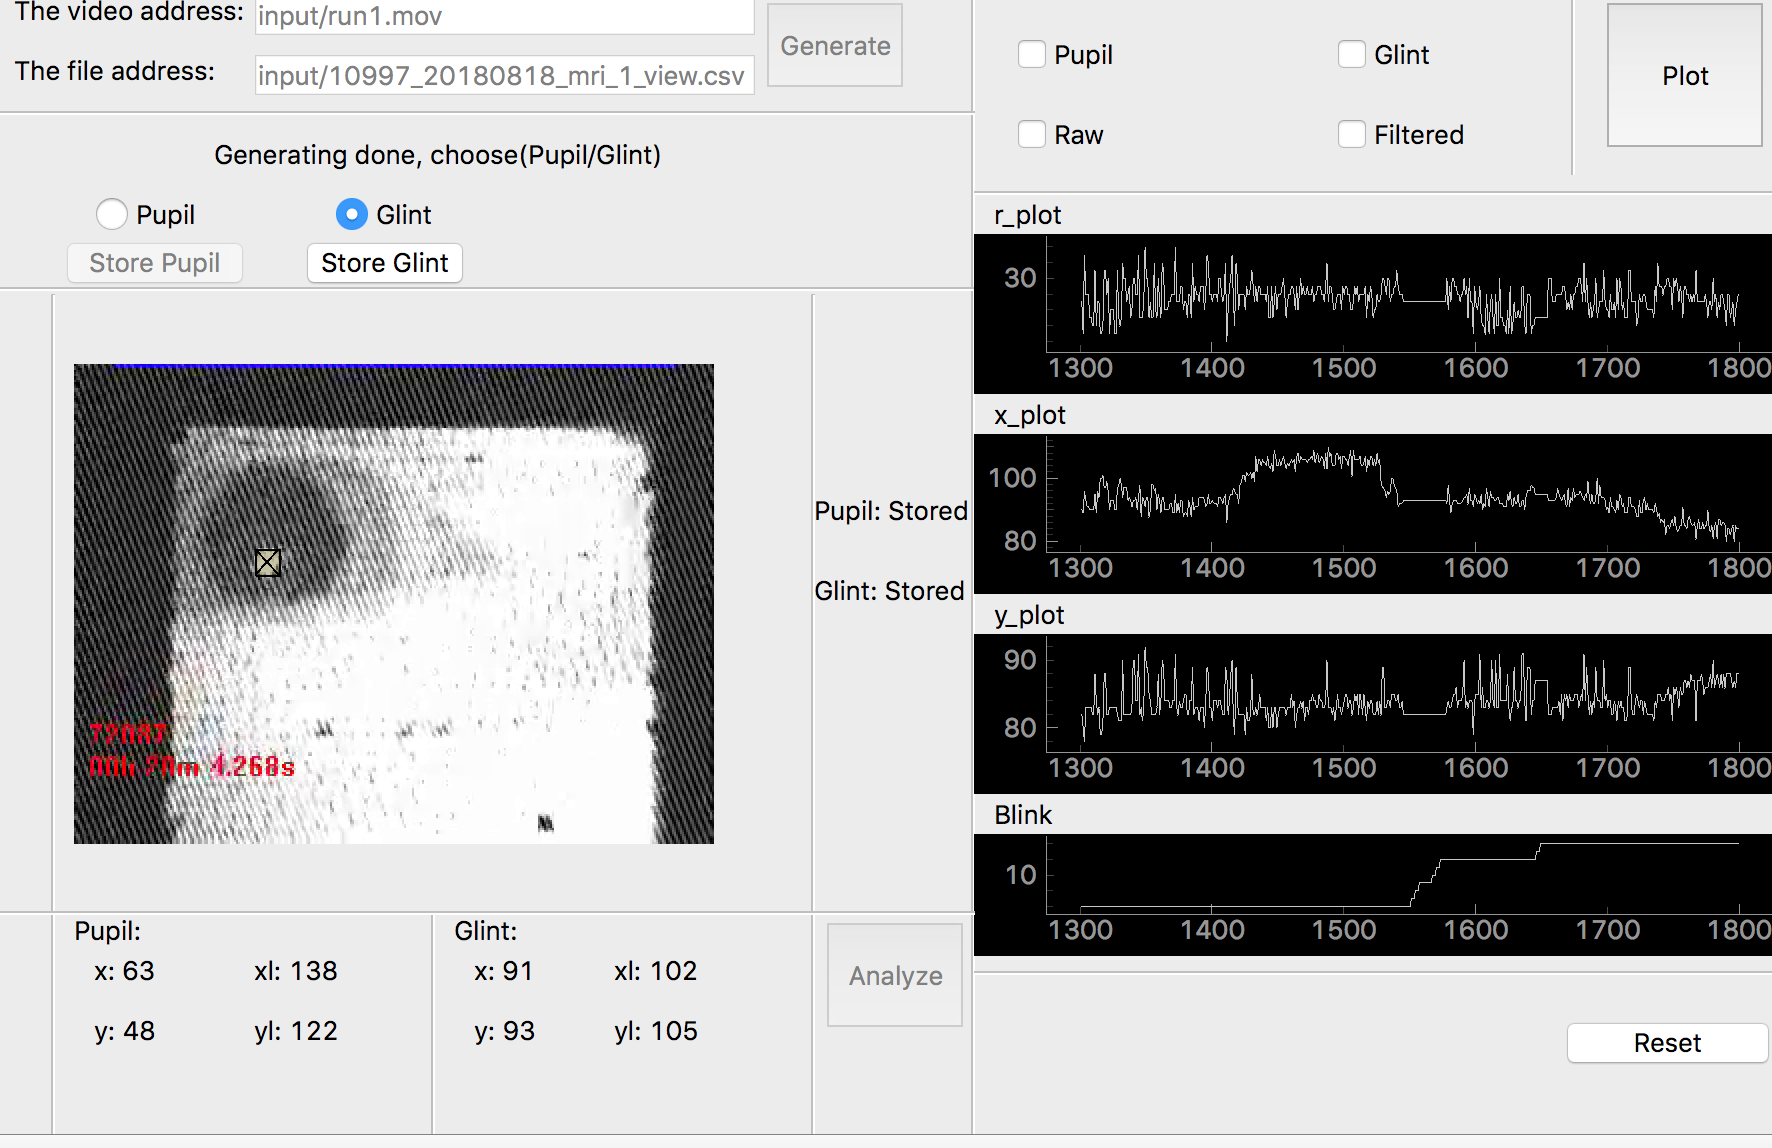

# Analysis
By looking at the chart plotted, it obviously doesn't match the camera frame given which is caused by the mismatch on the video frame pupil for which the initial x and y we don't know. However, after the angle is retrieved by calculating the distance between pupil and glint, we can find the exact mapped distance of the staring displacement. 

# Conclusion
The method introduced above for mapping is just the first step, which is highly imprecise. For more advanced mapping, one could use decision tree or logistic regression based neural network to improve the precision. Which will be implemented later.